Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import seaborn as sns

Load the Iris Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels
target_names = iris.target_names  # Class names
print("Feature Data (first 5 rows):\n", X[:5])
print("Target Labels (first 5):\n", y[:5])
print("Class Names:", target_names)

Feature Data (first 5 rows):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target Labels (first 5):
 [0 0 0 0 0]
Class Names: ['setosa' 'versicolor' 'virginica']


Standardize

In [3]:

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
print("Standardized Feature Data (first 5 rows):\n", X_standardized[:5])

Standardized Feature Data (first 5 rows):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [4]:

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)
print("LDA Transformed Data (first 5 rows):\n", X_lda[:5])

LDA Transformed Data (first 5 rows):
 [[ 8.06179978 -0.30042062]
 [ 7.12868772  0.78666043]
 [ 7.48982797  0.26538449]
 [ 6.81320057  0.67063107]
 [ 8.13230933 -0.51446253]]


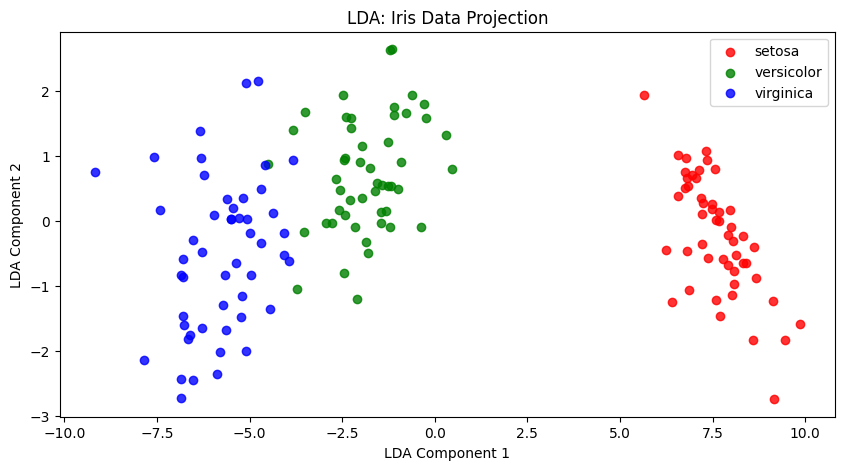

In [5]:
"""**Visualization of LDA**"""

plt.figure(figsize=(10, 5))
colors = ['r', 'g', 'b']
for i, color, label in zip(range(len(target_names)), colors, target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.8, color=color, label=label)
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.title("LDA: Iris Data Projection")
plt.legend()
plt.show()

In [6]:
"""**Apply PCA**"""

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
print("PCA Transformed Data (first 5 rows):\n", X_pca[:5])

PCA Transformed Data (first 5 rows):
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


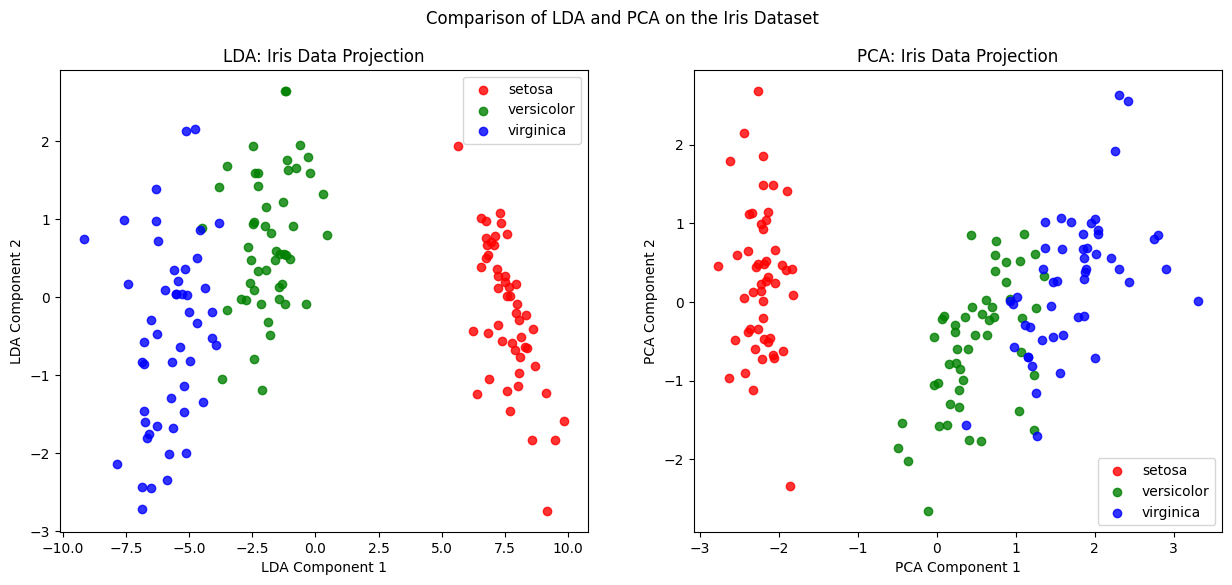

In [7]:
"""**Comparision of LDA and PCA**"""

# Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Plot the LDA and PCA results side-by-side for comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# LDA plot
colors = ['r', 'g', 'b']
for i, color, label in zip(range(len(target_names)), colors, target_names):
    ax1.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=0.8, color=color, label=label)
ax1.set_xlabel("LDA Component 1")
ax1.set_ylabel("LDA Component 2")
ax1.set_title("LDA: Iris Data Projection")
ax1.legend()

# PCA plot
for i, color, label in zip(range(len(target_names)), colors, target_names):
    ax2.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=0.8, color=color, label=label)
ax2.set_xlabel("PCA Component 1")
ax2.set_ylabel("PCA Component 2")
ax2.set_title("PCA: Iris Data Projection")
ax2.legend()

plt.suptitle("Comparison of LDA and PCA on the Iris Dataset")
plt.show()